##  Module 1 Exercises

The exercises in the notebook are similar to what has been discussed in lab and practice notebooks. 

**Activity 1: ** Read the NYC_death_causes data from **/datasets/NYC_death_causes** into variable called NYC_death_causes.

In [175]:
# Your code for activity 1 goes here..
import json
with open('../../../datasets/NYC/NYC_Causes_of_Death')as f:
    NYC_death_causes=json.load(f)


**Activity 2: ** Normalize the json formatted data in NYC_death_causes and save the result to NYC_data variable.

In [176]:
# Your code for activity 2 goes here..
from pandas.io.json import json_normalize
NYC_data = json_normalize(NYC_death_causes,'data')
NYC_data.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1095,EB649B90-D468-4471-A55B-8B66572E31F8,1095,1484932698,399231,1484932698,399231,None,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11,.,.
1,1096,47B92A6A-2EB4-48B3-A7F4-0AF00EBE4105,1096,1484932698,399231,1484932698,399231,None,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290,21.7,18.2
2,1097,FC47920F-22D9-415D-A4C2-463D3F8C918F,1097,1484932698,399231,1484932698,399231,None,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60,.,.
3,1098,3CF03BB4-BB37-4E6D-9E41-F7C36EDAD1FB,1098,1484932698,399231,1484932698,399231,None,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045,85.9,98.5
4,1099,EE1E1741-4019-46A3-BEDC-6EC23ED4CAB3,1099,1484932698,399231,1484932698,399231,None,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170,19.9,23.3


**Activity 3: ** Extract names of columns from the tags "meta/view/columns/" and save them in a list called names. Exclude the names from list which start with a ':' in the begining. 

In [177]:
# Your code for activity 3 goes here..
import numpy as np
names=[]
length=len(NYC_death_causes["meta"]["view"]["columns"])
for i in range(0,length):
    names.append(NYC_death_causes["meta"]["view"]["columns"][i]["fieldName"])
names

[':sid',
 ':id',
 ':position',
 ':created_at',
 ':created_meta',
 ':updated_at',
 ':updated_meta',
 ':meta',
 'year',
 'leading_cause',
 'sex',
 'race_ethnicity',
 'deaths',
 'death_rate',
 'age_adjusted_death_rate']

**Activity 4: ** Drop the columns 0 through 7 from NYC_data and assign the result back to NYC_data.

In [178]:
# Your code for activity 4 goes here..
NYC_data.drop(NYC_data.columns[[0,1,2,3,4,5,6,7]],axis = 1,inplace=True)
names=[ word for word in names if not ":"in word]
names



['year',
 'leading_cause',
 'sex',
 'race_ethnicity',
 'deaths',
 'death_rate',
 'age_adjusted_death_rate']

**Activity 5: ** Rename the columns with the extracted names to replace the default numbered column names.

In [179]:
# Your code for activity 5 goes here..

NYC_data.rename(index=str,columns={8:names[0],9:names[1],10:names[2],11:names[3],12:names[4],\
13:names[5],14:names[6]},inplace=True)

In [180]:
NYC_data.head()

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
0,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11,.,.
1,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290,21.7,18.2
2,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60,.,.
3,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045,85.9,98.5
4,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170,19.9,23.3


**Activity 6: ** Draw a countplot for the number of NaN values in each row. This is similar to what is done in the lab.

In [181]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
sns.set_style ('whitegrid')

the porportion of entries with non-NaN values is 100.000000%


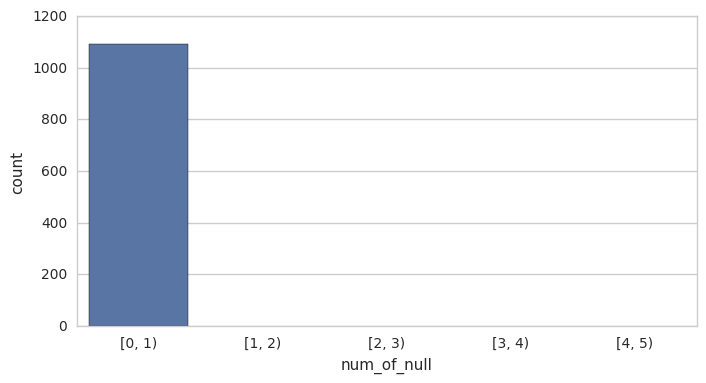

In [182]:
# Your code for activity 6 goes here..
import pandas as pd
import numpy as np

num_data = NYC_data.iloc[0:,4:]
num_data=pd.DataFrame(num_data)
#pd.to_numeric(num_data,errors='coerce')
num_data['num_of_null'] = num_data.isnull().sum(axis=1)
print('the porportion of entries with non-NaN values is {:2f}%'.format(len(num_data[num_data.num_of_null==0])/len(num_data)*100))
bins=[0,1,2,3,4,5]
cut=pd.cut(num_data.num_of_null,bins=bins,include_lowest=True,right=False)
fig,axis1=plt.subplots(1,figsize=(8,4))
sns.countplot(x=cut,data=cut.to_frame(),ax=axis1)
sns.plt.show()

**Activity 7: ** Replace ".." present in rows with a valid NAN and re draw the above plot. 

The proportion of entries with non_NAN values is 64.716636%


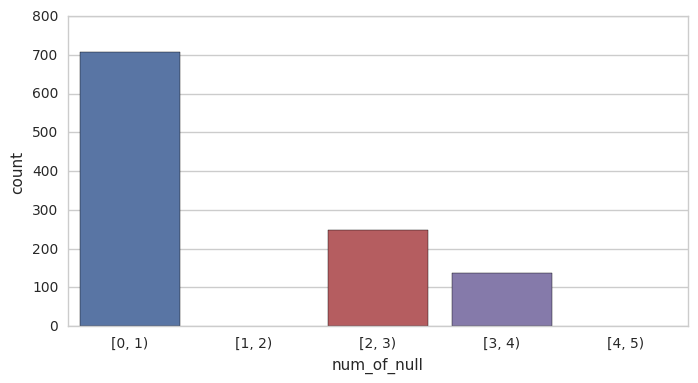

In [183]:
# Your code for activity 7 goes here..
import pandas as pd
import numpy as np
num_data1=num_data.replace(".",np.NAN,inplace=True)
num_data1=num_data
#num_data1=pd.DataFrame(num_data1)
num_data1['num_of_null'] = num_data1.isnull().sum(axis=1)
print('The proportion of entries with non_NAN values is {:2f}%'.format(len(num_data1[num_data1.num_of_null==0])/len(num_data1)*100))
bins=[0,1,2,3,4,5]
cut=pd.cut(num_data1.num_of_null,bins=bins,include_lowest=True,right=False)
fig,axis1=plt.subplots(1,figsize=(8,4))
sns.countplot(x=cut,data=cut.to_frame(),ax=axis1)
sns.plt.show()

In [184]:
NYC_data.shape

(1094, 7)

In [201]:
# Your code for activity 8 goes here
num_data = NYC_data.iloc[0:, 4:]
num_data['num_of_null'] = num_data.isnull().sum(axis=1)

from sklearn.preprocessing import Imputer
num_data_median = num_data.copy()
imp_median = Imputer(missing_values='NaN', strategy='median', axis=0, copy=False)
pd.DataFrame(imp_median.fit_transform(num_data_median))


,0,1,2,3
0,11.0,18.35,20.35,2.0
1,290.0,21.70,18.20,0.0
2,60.0,18.35,20.35,2.0
3,1045.0,85.90,98.50,0.0
4,170.0,19.90,23.30,0.0
5,148.5,18.35,20.35,3.0
6,14.0,18.35,20.35,2.0
7,163.0,15.50,14.80,0.0
8,101.0,8.20,9.50,0.0
9,1382.0,123.10,227.90,0.0


**Activity 9: ** Find all rows where number of deaths are greater than 3 standard deviations from average. 

In [202]:
# Your code for activity 9 goes here..
from scipy import stats
cnum_data[(np.abs(stats.zscore(cnum_data[["deaths"]]))>3).all(axis=1)]


,deaths,death_rate,age_adj_death_rate
61,3408.0,254.1,216.6
79,3356.0,250.9,213.7
119,5351.0,374.2,189.2
190,3346.0,232.9,159.0
195,3371.0,238.0,161.1
218,4535.0,319.0,160.6
358,5503.0,410.0,342.3
369,3236.0,240.5,205.6
403,6836.0,476.2,245.5
423,3222.0,241.6,206.1


**Activity 10: ** Draw a scatter plot between the columns deaths and death rate. Use "leading_cause" as the color label for points. EXplain the graph briefly in below markdown cell. 

`Hint`: Use [ggplot library](http://ggplot.yhathq.com/docs/index.html)

In [210]:

columns=NYC_data[['year','leading_cause','sex','race_ethnicity']]
df=pd.concat([columns,pd.DataFrame(imp_median.fit_transform(num_data_median), index = NYC_data.index)],axis=1)
df.rename(index=str,columns={0:'death',1:'death_rate',2:'age_adj_death_rate'},inplace=True)
del df[3]
df.head()

,year,leading_cause,sex,race_ethnicity,death,death_rate,age_adj_death_rate
0,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11.0,18.35,20.35
1,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290.0,21.70,18.20
2,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60.0,18.35,20.35
3,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045.0,85.90,98.50
4,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170.0,19.90,23.30


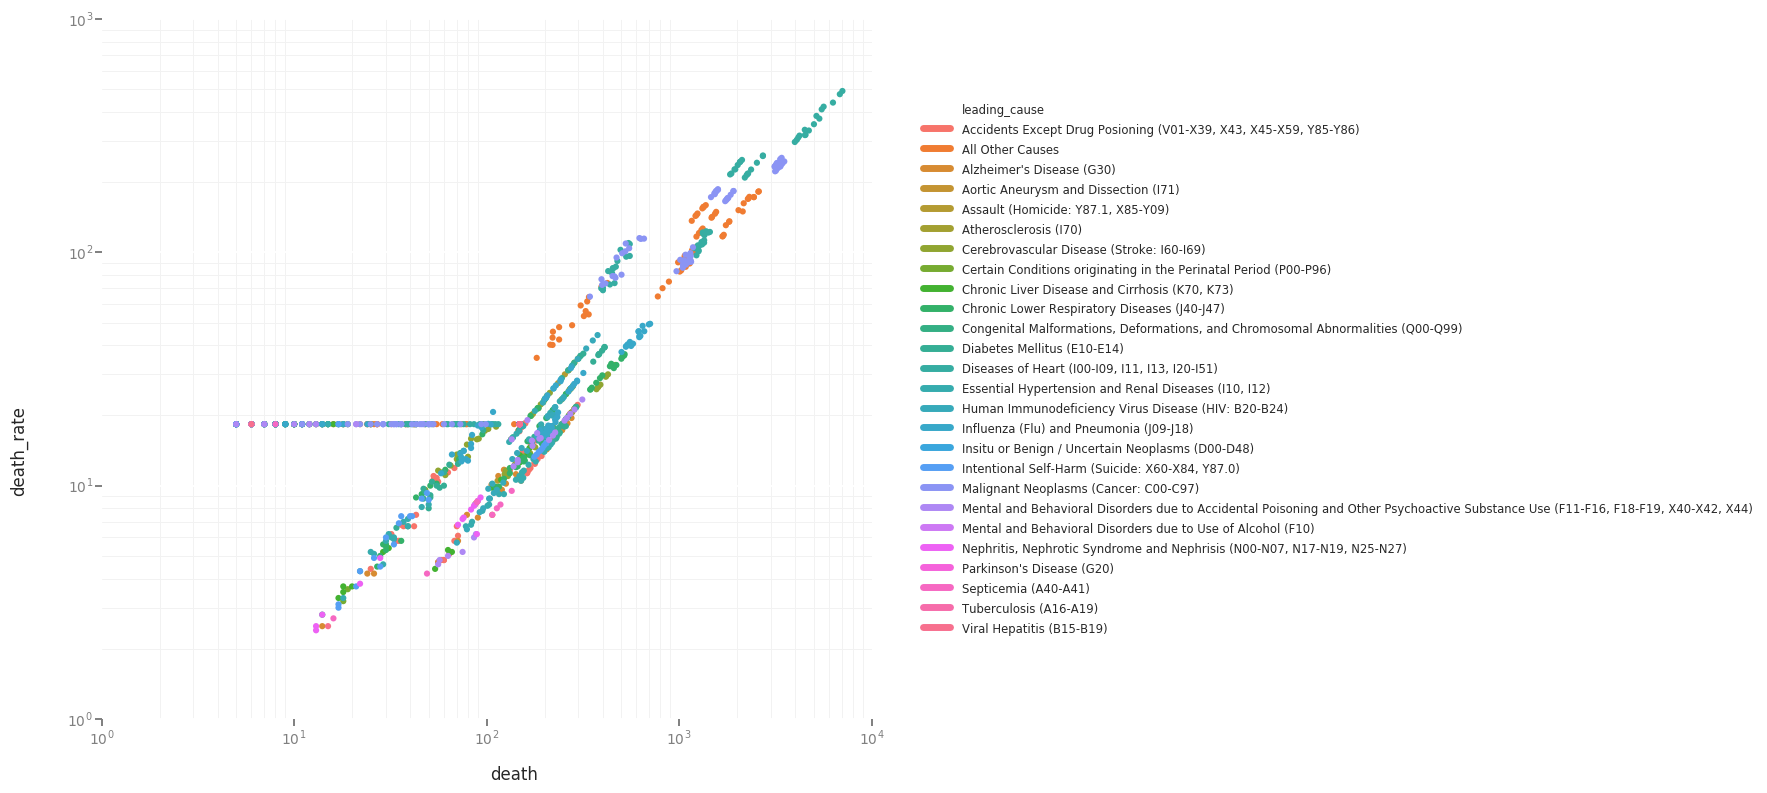

<ggplot: (-9223363277978707533)>

In [248]:
# Your code for activity 10 goes here..
from ggplot import*
ggplot(aes(x='death', y='death_rate', color='leading_cause'), data=df)  + geom_point()+\
theme(plot_margin = dict(right = 8, top=1))+scale_x_log()+scale_y_log()+ theme_bw()




    ` Your answer for activity 10 goes here...

**Activity 11: ** Draw a histogram for deaths by year.

`Hint`: Use pandas datframe histogram functions

**Reference: ** [pandas visualizations](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html)

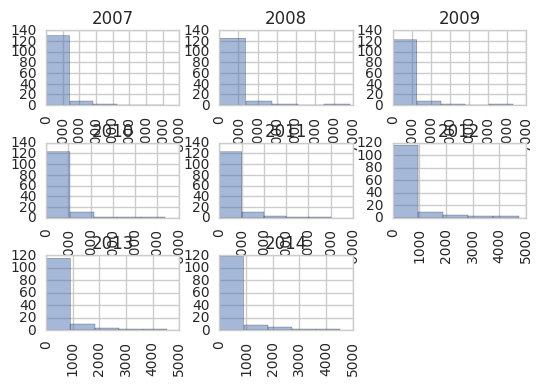

In [255]:
# Your code for activity 11 goes here..
import matplotlib.pyplot as plt
df.hist(column='death', by='year',bins=5,alpha = 0.5)+ geom_text(stat='identity')
plt.show()


**Activity 12: ** Draw a box plot for deaths by year again. Give your thoughts on the plot in below markdown cell. 

(0, 800)

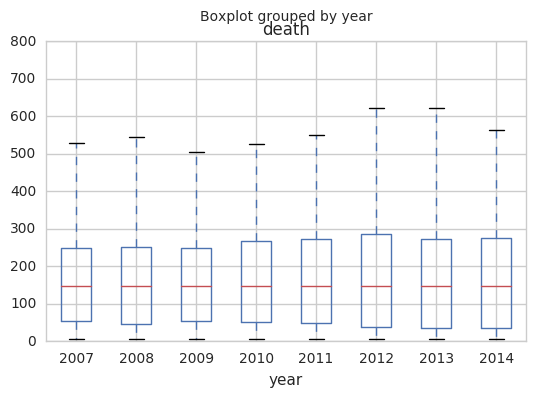

In [269]:
# Your code for activity 12 goes here..
import matplotlib.pyplot as plt 
data_box=df.boxplot(column=['death'], by='year')
data_box.set_ylim(0,800)

The box plot is more informative compare to the histogram in a sense that its a variety of statistics per year the meam,the min,max(which can help identify outliers) values.